In [2]:
from sklearn.datasets import fetch_lfw_people
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier 

In [3]:
dataset=fetch_lfw_people(min_faces_per_person=70,resize=0.4) #resize value will reduce the target feature
x=dataset.data
y=dataset.target
target_names=dataset.target_names
images=dataset.images

In [4]:
n,h,w=images.shape
print(n)
print(h)
print(w)

1288
50
37


In [5]:
x.shape

(1288, 1850)

In [6]:
len(target_names)

7

In [7]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([ 77, 236, 121, 530, 109,  71, 144], dtype=int64))

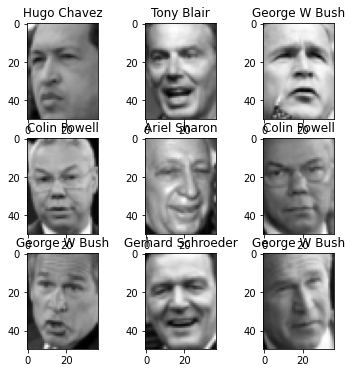

In [8]:
def plot_grid(images,titles,h,w,rows=3,cols=3):
    plt.figure(figsize=(2*cols,2*rows))
    for i in range (rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i].reshape(h,w),cmap='gray')
        plt.title(target_names[titles[i]])
plot_grid(x,y,h,w)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [10]:
x_train.shape

(1159, 1850)

In [11]:
p1=PCA(n_components=500)
p1.fit(x_train)

PCA(n_components=500)

In [12]:
x_train_trans_1=p1.transform(x_train)
x_test_trans_1=p1.transform(x_test)


In [13]:
x_train_trans_1.shape

(1159, 500)

In [15]:
clf=MLPClassifier(hidden_layer_sizes=(128,),batch_size=128,verbose=True,early_stopping=True)
clf.fit(x_train_trans_1,y_train)

Iteration 1, loss = 11.62155228
Validation score: 0.284483
Iteration 2, loss = 7.26393055
Validation score: 0.491379
Iteration 3, loss = 4.42709035
Validation score: 0.612069
Iteration 4, loss = 2.21960940
Validation score: 0.663793
Iteration 5, loss = 1.07162274
Validation score: 0.672414
Iteration 6, loss = 0.44493115
Validation score: 0.681034
Iteration 7, loss = 0.14600975
Validation score: 0.715517
Iteration 8, loss = 0.04876872
Validation score: 0.706897
Iteration 9, loss = 0.01728741
Validation score: 0.698276
Iteration 10, loss = 0.00025804
Validation score: 0.706897
Iteration 11, loss = 0.00023082
Validation score: 0.706897
Iteration 12, loss = 0.00019341
Validation score: 0.706897
Iteration 13, loss = 0.00017433
Validation score: 0.706897
Iteration 14, loss = 0.00015680
Validation score: 0.706897
Iteration 15, loss = 0.00014449
Validation score: 0.706897
Iteration 16, loss = 0.00013741
Validation score: 0.706897
Iteration 17, loss = 0.00013281
Validation score: 0.706897
Itera

MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(128,),
              verbose=True)

In [16]:
y_pred=clf.predict(x_test_trans_1)
print(classification_report(y_test,y_pred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.60      0.63        10
     Colin Powell       0.78      0.64      0.70        22
  Donald Rumsfeld       0.64      0.50      0.56        18
    George W Bush       0.74      0.80      0.77        50
Gerhard Schroeder       0.50      0.50      0.50        10
      Hugo Chavez       0.56      0.56      0.56         9
       Tony Blair       0.53      0.80      0.64        10

         accuracy                           0.67       129
        macro avg       0.63      0.63      0.62       129
     weighted avg       0.68      0.67      0.67       129



In [17]:
p=PCA()
p.fit(x_train)


PCA()

In [18]:
p.transform(x_train).shape

(1159, 1159)

In [19]:
var=p.explained_variance_
print(var)
com=p.components_
print(com.shape)

[4.9335191e+05 3.8901581e+05 1.9096580e+05 ... 4.3846583e-01 4.1377571e-01
 3.2184362e-06]
(1159, 1850)


In [20]:
val_sum=np.sum(p.explained_variance_)
print(val_sum)
sort_ind=np.argsort(var) #return indices for var values which are in ascending order
sort_ind=sort_ind[::-1]#to invert the sort_ind to desc  order
print(sort_ind)

2604531.8
[   0    1    2 ... 1156 1157 1158]


In [21]:
temp_sum=0
principal_vec=[]
principal_val=[]
i=0
while(temp_sum<0.98*val_sum):
    principal_vec.append(com[sort_ind[i],:])
    principal_val.append(var[sort_ind[i]])
    temp_sum+=var[sort_ind[i]]
    i+=1
print("Number of components is{}".format(i))

Number of components is251


In [22]:
principal_vec=np.matrix(principal_vec)


In [23]:
print(principal_vec.shape)

(251, 1850)


In [24]:
x_train_trans=np.dot(x_train,principal_vec.T)
x_test_trans=np.dot(x_test,principal_vec.T)

In [25]:
x_train_trans.shape

(1159, 251)

In [27]:
clf_t=MLPClassifier(hidden_layer_sizes=(128,), batch_size=128,verbose=True,early_stopping=True)
clf_t.fit(x_train_trans,y_train)

Iteration 1, loss = 11.66034792
Validation score: 0.215517
Iteration 2, loss = 10.47422277
Validation score: 0.448276
Iteration 3, loss = 9.52899456
Validation score: 0.362069
Iteration 4, loss = 7.64632843
Validation score: 0.517241
Iteration 5, loss = 5.87143415
Validation score: 0.525862
Iteration 6, loss = 4.65590794
Validation score: 0.612069
Iteration 7, loss = 3.73128946
Validation score: 0.663793
Iteration 8, loss = 2.70944722
Validation score: 0.672414
Iteration 9, loss = 2.34395671
Validation score: 0.732759
Iteration 10, loss = 2.17432227
Validation score: 0.741379
Iteration 11, loss = 1.36926678
Validation score: 0.741379
Iteration 12, loss = 1.05756570
Validation score: 0.767241
Iteration 13, loss = 0.77291859
Validation score: 0.784483
Iteration 14, loss = 0.54327945
Validation score: 0.767241
Iteration 15, loss = 0.32894161
Validation score: 0.784483
Iteration 16, loss = 0.29927327
Validation score: 0.767241
Iteration 17, loss = 0.25077305
Validation score: 0.784483
Iter

MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(128,),
              verbose=True)

In [28]:
y_pred=clf_t.predict(x_test_trans)
print(classification_report(y_test,y_pred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.60      0.71        10
     Colin Powell       0.80      0.73      0.76        22
  Donald Rumsfeld       0.75      0.67      0.71        18
    George W Bush       0.90      0.90      0.90        50
Gerhard Schroeder       0.57      0.80      0.67        10
      Hugo Chavez       0.60      0.67      0.63         9
       Tony Blair       0.58      0.70      0.64        10

         accuracy                           0.78       129
        macro avg       0.72      0.72      0.72       129
     weighted avg       0.79      0.78      0.78       129



In [38]:
def plot_grid(images,titles,h,w,rows=3,cols=3):
    plt.figure(figsize=(2*cols,2*rows))
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.imshow(images[i].reshape(h,w),cmap='gray')
        plt.title(titles[i])


        

In [39]:
n_components=273
mean_imgs=[]
for i in range(n_components):
    v=principal_vec[i,:]
    img=v.reshape((h,w))
    mean_imgs.append(img)
mean_imgs=np.array(mean_imgs)
print(mean_imgs.shape)

IndexError: index 251 is out of bounds for axis 0 with size 251

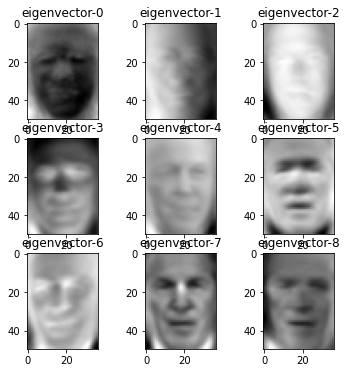

In [40]:
pca_tiles=[f"eigenvector-{i}" for i in  range(n_components)]
plot_grid(mean_imgs,pca_tiles,h,w)